In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
titanic_data = pd.read_csv(r'C:\Users\Anu\Downloads\titanic.csv')

In [3]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## Analyzing Data Set 

In [4]:
titanic_data.shape

(887, 8)

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


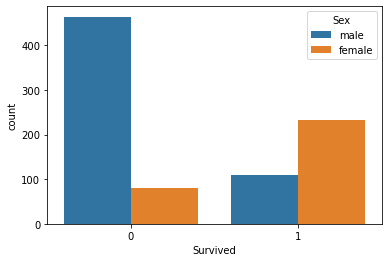

In [6]:
# check the servival with sex
sns.countplot(x=  'Survived', hue ='Sex',data= titanic_data);

<AxesSubplot:xlabel='Survived', ylabel='count'>

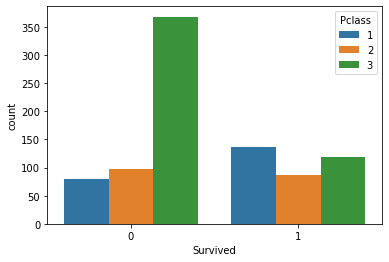

In [7]:
# Check the servival with p class
sns.countplot(x='Survived', hue= 'Pclass',data= titanic_data)

C:\Users\Anu\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


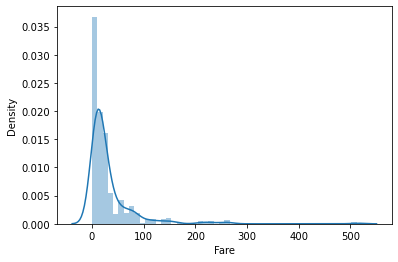

In [8]:
sns.distplot(titanic_data['Fare']);

<AxesSubplot:ylabel='Frequency'>

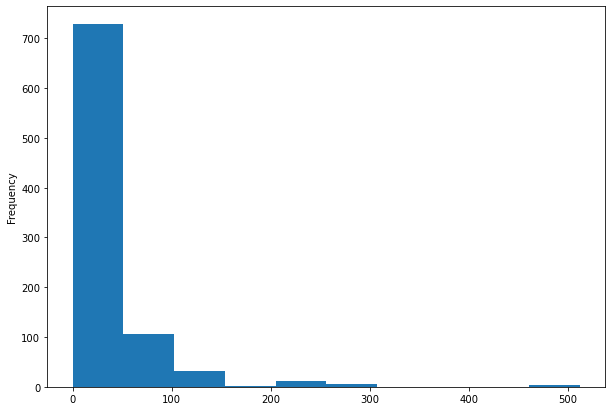

In [9]:
titanic_data['Fare'].plot.hist(figsize=(10,7))

C:\Users\Anu\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

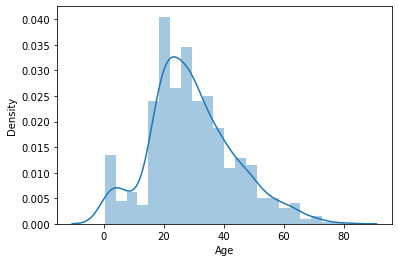

In [10]:
# Check Age distribution

sns.distplot(titanic_data['Age'])

In [11]:
titanic_data.isnull()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
882,False,False,False,False,False,False,False,False
883,False,False,False,False,False,False,False,False
884,False,False,False,False,False,False,False,False
885,False,False,False,False,False,False,False,False


In [12]:
titanic_data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [13]:
titanic_data.duplicated().sum()

0

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

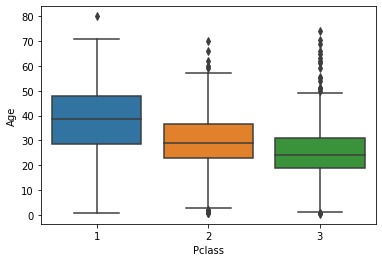

In [14]:
sns.boxplot(x= 'Pclass',y='Age',data= titanic_data)

In [15]:
# Change data type for pclass
titanic_data['Pclass']= titanic_data['Pclass'].astype('object')

In [16]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    object 
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 55.6+ KB


In [17]:
# One hot encoding
titanic_data = pd.get_dummies(data= titanic_data, columns=['Pclass','Sex'],drop_first= True)

In [18]:
titanic_data.head()

,Survived,Name,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass_2,Pclass_3,Sex_male
0,0,Mr. Owen Harris Braund,22.0,1,0,7.2500,0,1,1
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,38.0,1,0,71.2833,0,0,0
2,1,Miss. Laina Heikkinen,26.0,0,0,7.9250,0,1,0
3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0,1,0,53.1000,0,0,0
4,0,Mr. William Henry Allen,35.0,0,0,8.0500,0,1,1


In [23]:
titanic_data.drop(['Fare'],axis=1,inplace=True)

In [24]:
titanic_data.head()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Pclass_2,Pclass_3,Sex_male
0,0,22.0,1,0,0,1,1
1,1,38.0,1,0,0,0,0
2,1,26.0,0,0,0,1,0
3,1,35.0,1,0,0,0,0
4,0,35.0,0,0,0,1,1


## Apply ML Algorithms

In [ ]:
# Y Will say if passanger will servived or not
# X is value to be predicted

In [30]:
X = titanic_data.drop(['Survived'],axis=1)
X

,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Pclass_2,Pclass_3,Sex_male
0,22.0,1,0,0,1,1
1,38.0,1,0,0,0,0
2,26.0,0,0,0,1,0
3,35.0,1,0,0,0,0
4,35.0,0,0,0,1,1
...,...,...,...,...,...,...
882,27.0,0,0,1,0,1
883,19.0,0,0,0,0,0
884,7.0,1,2,0,1,0
885,26.0,0,0,0,0,1


In [29]:
y= titanic_data['Survived']

In [28]:
# From sk learn cross validation import train_test_split
from sklearn.model_selection import train_test_split

In [58]:
# devide the data into test and train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=1)

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
logmodel= LogisticRegression()

In [61]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [62]:
predictions = logmodel.predict(X_test)

In [63]:
# To test how model is performing we can test the accuracy or classification report
# This is one method
from sklearn.metrics import classification_report


In [64]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.82      0.84      0.83       106\n           1       0.75      0.72      0.74        72\n\n    accuracy                           0.79       178\n   macro avg       0.79      0.78      0.78       178\nweighted avg       0.79      0.79      0.79       178\n'

In [65]:
# Method 2 - confusion metrics
from sklearn.metrics import confusion_matrix

In [66]:
# Predict No,Predict Yes- Col1,Col2
# Actual No,Actual Yes- row1,row2
confusion_matrix(y_test,predictions)

array([[89, 17],
       [20, 52]], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score


In [68]:
accuracy_score(y_test,predictions)

0.7921348314606742